In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3>Convolution & Kernel</h3>

In [89]:
image = np.array([[1,0,2,1,0],
                  [0,2,3,0,1],
                  [1,0,1,1,2],
                  [0,2,2,0,3],
                  [0,4,1,2,0]])

image = image/5.0

image

array([[0.2, 0. , 0.4, 0.2, 0. ],
       [0. , 0.4, 0.6, 0. , 0.2],
       [0.2, 0. , 0.2, 0.2, 0.4],
       [0. , 0.4, 0.4, 0. , 0.6],
       [0. , 0.8, 0.2, 0.4, 0. ]])

In [90]:
kernal1 = np.array([[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]])

im2 = cv2.filter2D(src=image, ddepth=-1, kernel=kernal1)

In [91]:
im2_int = (im2*5).astype('int')
im2_int

array([[ 0,  7, -3, -6,  0],
       [ 0,  4,  0, -3,  0],
       [ 0,  5, -3,  0,  0],
       [ 0,  3, -3,  0,  0],
       [ 0,  5, -6,  0,  0]])

In [92]:
np.max(image)

0.8

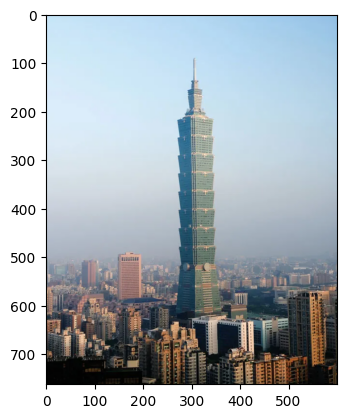

In [93]:
imgfile = cv2.imread("image/tower-Taipei-101-Taiwan.jpg.webp")

# Convert BGR image to RGB
rgb_image = cv2.cvtColor(imgfile, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)


<h3>Kernel</h3>

In [94]:
kernal1 = np.array([[-1, 0, 1], # V
                  [-3, 0, 3],
                  [-1, 0, 1]])

In [95]:
kernal2 = np.array([[-1, -3, 1], # H
                  [0, 0, 0],
                  [-1, 3, 1]])

In [96]:
kernal3 = np.array([[-1, 0, 3], # \
                  [-1, 0, 1],
                  [-3, 0, 1]])

<h3>Convolution 2D</h3>

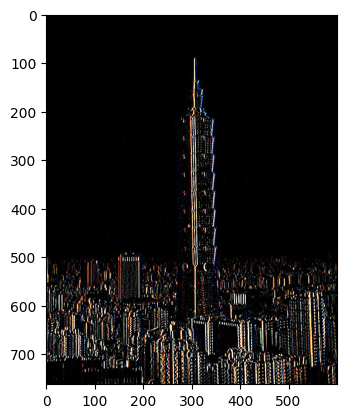

In [97]:
pixel = np.array(rgb_image)
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernal1,)
plt.imshow(fea_map)

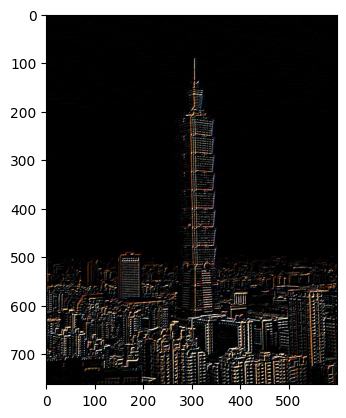

In [98]:
pixel = np.array(rgb_image)
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernal2,)
plt.imshow(fea_map)

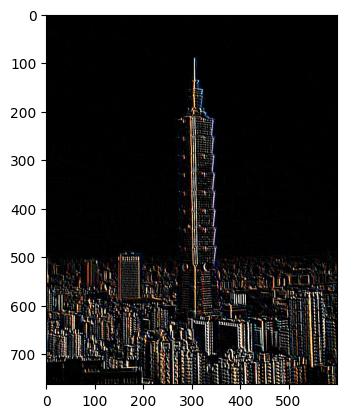

In [99]:
pixel = np.array(rgb_image)
fea_map = cv2.filter2D(src=pixel, ddepth=-1, kernel=kernal3,)
plt.imshow(fea_map)

<h3>Pooling</h3>

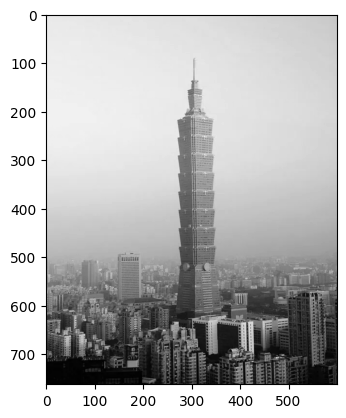

In [100]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [101]:
pixel = np.array(gray_image)
pixel.shape

(763, 600)

1/1 [==============================] - 0s 21ms/step


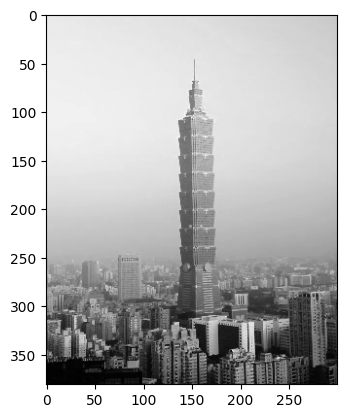

In [102]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D

arr = pixel.reshape(1, 763, 600, 1)

model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2)))

output = model.predict(arr)

output = np.squeeze(output)

plt.imshow(output, cmap='gray')

In [103]:
output.shape

(381, 300)

1/1 [==============================] - 0s 22ms/step


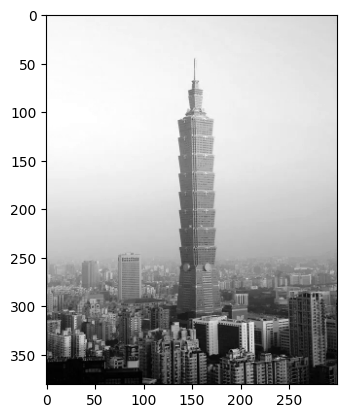

In [104]:
pixel2 = pixel.astype('float')

arr = pixel2.reshape(1, 763, 600, 1)

model = Sequential()
model.add(AveragePooling2D(pool_size=(2, 2)))

output = model.predict(arr).astype('uint8')

output = np.squeeze(output)

plt.imshow(output, cmap='gray')

In [105]:
output.shape

(381, 300)

In [106]:
output

array([[231, 231, 231, ..., 197, 197, 197],
       [231, 231, 231, ..., 197, 197, 197],
       [231, 231, 231, ..., 197, 197, 197],
       ...,
       [  2,   2,   2, ...,  32,  50,  31],
       [  2,   2,   2, ...,  33,  49,  31],
       [  3,   3,   3, ...,  33,  48,  30]], dtype=uint8)

<h3>Squeeze, Max, & Avg Pooling</h3>

In [115]:
image = np.array([[2, 3, 4, 2],
                  [8, 5, 5, 1],
                  [6, 7, 9, 4],
                  [3, 1, 4, 5]])

arr = image.reshape(1, 4, 4, 1)

<h3>Max Pooling</h3>

In [109]:
model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2)))

output = model.predict(arr)
print(output.shape)

print(output)

1/1 [==============================] - 0s 20ms/step
(1, 2, 2, 1)
[[[[8]
   [5]]

  [[7]
   [9]]]]


In [110]:
output = np.squeeze(output)
output

array([[8, 5],
       [7, 9]])

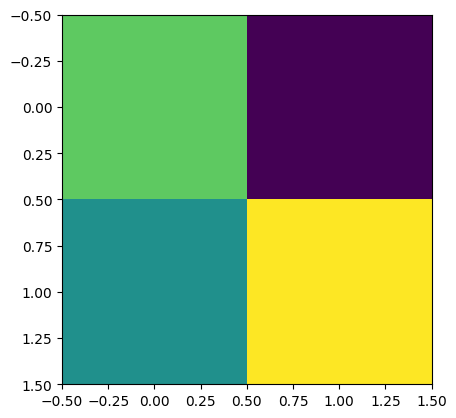

In [113]:
plt.imshow(output)

<h3>Average Pooling</h3>

In [116]:
model = Sequential()

model.add(AveragePooling2D(pool_size=(2,2)))
output =model.predict(arr.astype('float'))

print(output)

1/1 [==============================] - 0s 19ms/step
[[[[4.5 ]
   [3.  ]]

  [[4.25]
   [5.5 ]]]]


In [117]:
output = np.squeeze(output)

output

array([[4.5 , 3.  ],
       [4.25, 5.5 ]], dtype=float32)

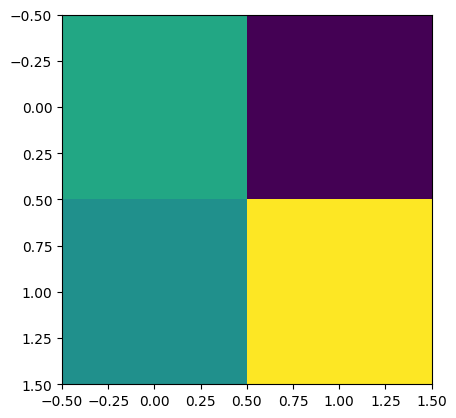

In [118]:
plt.imshow(output)